<h1>Is Global Warming happening in YEG?</h1>

<p>According to the National Academies of Science, Engineering and Medicine: "<i>As Earth’s climate has warmed, a new pattern of more frequent and more intense weather events has unfolded around the world. Scientists identify these extreme weather events based on the historical record of weather in a particular region. They consider extreme weather events to be those that produce unusually high or low levels of rain or snow, temperature, wind, or other effects. Typically, these events are considered extreme if they are unlike 90% or 95% of similar weather events that happened before in that same area.</i>"
Source: Click <a href="https://www.nationalacademies.org/based-on-science/climate-change-global-warming-is-contributing-to-extreme-weather-events">HERE</a></p> 

<p>We have obtained Edmonton Weather data tracing back to January 01, 2000 from the Edmonton Blatchford Station (Located at the old city center airport). We will use this data to examine the difference in average weather data collected each year and compare it to subsequent years. Our Hypothesis is that, the difference is due to chance and not systematic as proposed by the scientists above. We are going to concentrate only on the Temperature recordings.</p>

<p>First, we'll import some tools we need, load the data and explore.<p> 

In [1]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [2]:
# Importing the data
df = pd.read_csv('WeatherEDM.csv')
df.head()

C:\Users\barak\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Station ID,Station Name,Station Province,Station Latitude,Station Longitude,Location,Station Elevation (m),Station Climate Identifier,Station WMO Identifier,...,Date and Time,Temperature (degrees C),Dewpoint Temperature (degrees C),Relative Humidity,Wind Direction (10s degrees),Wind Speed (km/h),Visibility (km),Air Pressure (kPa),Humidex,Wind Chill (degrees C)
0,4685020191208070000,46850,THORSBY AGCM,ALBERTA,53.22,-113.89,"(53.22, -113.89)",754.0,3016441,71504.0,...,2019/12/08 07:00:00 AM,-13.7,-15.7,85.0,NaN,NaN,NaN,NaN,NaN,NaN
1,4685020191208080000,46850,THORSBY AGCM,ALBERTA,53.22,-113.89,"(53.22, -113.89)",754.0,3016441,71504.0,...,2019/12/08 08:00:00 AM,-13.5,-15.6,85.0,NaN,NaN,NaN,NaN,NaN,NaN
2,4685020191208100000,46850,THORSBY AGCM,ALBERTA,53.22,-113.89,"(53.22, -113.89)",754.0,3016441,71504.0,...,2019/12/08 10:00:00 AM,-14.0,-16.3,83.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4685020191208110000,46850,THORSBY AGCM,ALBERTA,53.22,-113.89,"(53.22, -113.89)",754.0,3016441,71504.0,...,2019/12/08 11:00:00 AM,-13.6,-15.8,83.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4685020191208120000,46850,THORSBY AGCM,ALBERTA,53.22,-113.89,"(53.22, -113.89)",754.0,3016441,71504.0,...,2019/12/08 12:00:00 PM,-10.7,-14.3,75.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Removing the columns we do not need
df = df.drop(columns={'Row ID', 'Station ID', 'Station Province', 'Station Latitude', "Station Longitude", 'Location', 'Station Elevation (m)'})
df = df.drop(columns={'Station WMO Identifier', 'Station Note', 'Wind Direction (10s degrees)', 'Visibility (km)', "Relative Humidity"})
df = df.drop(columns={'Humidex', 'Dewpoint Temperature (degrees C)', 'Wind Speed (km/h)', 'Air Pressure (kPa)', 'Air Pressure (kPa)'})
df = df.drop(columns={'Wind Chill (degrees C)', 'Station TC Identifier'})
df.sample()

,Station Name,Station Climate Identifier,Date and Time,Temperature (degrees C)
333122,EDMONTON STONY PLAIN,301222F,2004/12/30 10:00:00 AM,NaN


In [4]:
# Looking at the composition of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560779 entries, 0 to 1560778
Data columns (total 4 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Station Name                1560779 non-null  object 
 1   Station Climate Identifier  1560779 non-null  object 
 2   Date and Time               1560779 non-null  object 
 3   Temperature (degrees C)     1419562 non-null  float64
dtypes: float64(1), object(3)
memory usage: 47.6+ MB


<li> Looks like we do have a few null entries on the temperature column. Will deal with them below.

In [5]:
# Renaming the columns for asthetic (no long names) and dropping the nulls
df = df.rename(columns={'Station Climate Identifier': 'ClimateID','Date and Time': 'Date', 'Temperature (degrees C)': 'Temp'})
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1419562 entries, 0 to 1560778
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Station Name  1419562 non-null  object 
 1   ClimateID     1419562 non-null  object 
 2   Date          1419562 non-null  object 
 3   Temp          1419562 non-null  float64
dtypes: float64(1), object(3)
memory usage: 54.2+ MB


In [6]:
# Creating an extra column that shows year (We will need this column to chop up the data)
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df.head()

,Station Name,ClimateID,Date,Temp,Year,Month
0,THORSBY AGCM,3016441,2019-12-08 07:00:00,-13.7,2019,12
1,THORSBY AGCM,3016441,2019-12-08 08:00:00,-13.5,2019,12
2,THORSBY AGCM,3016441,2019-12-08 10:00:00,-14.0,2019,12
3,THORSBY AGCM,3016441,2019-12-08 11:00:00,-13.6,2019,12
4,THORSBY AGCM,3016441,2019-12-08 12:00:00,-10.7,2019,12


In [7]:
# Deleting data from the year 2021 since we don't have complete data for that year
df = df[df.Year != 2021]

<li> Below we are going to chop the data to only include the weather station of our interest (ie Edmonton Blatchford)

In [8]:
df['Station Name'].unique()

array(['THORSBY AGCM', 'EDMONTON INTERNATIONAL CS',
       'EDMONTON STONY PLAIN CS', 'EDMONTON BLATCHFORD',
       'EDMONTON NAMAO AWOS A', 'EDMONTON SOUTH CAMPUS',
       'EDMONTON STONY PLAIN', 'NEW SAREPTA AGCM', 'OLIVER AGDM',
       'EDMONTON VILLENEUVE A', 'LEGAL AGCM'], dtype=object)

In [9]:
# Blachford
dfB = df[df['Station Name']=='EDMONTON BLATCHFORD']
dfB = dfB.drop(columns={'Station Name', 'ClimateID'})
dfB.head()

,Date,Temp,Year,Month
17,2019-12-02 15:00:00,1.7,2019,12
32,2018-05-20 02:00:00,11.6,2018,5
39,2018-05-20 16:00:00,23.3,2018,5
41,2018-05-20 17:00:00,23.6,2018,5
43,2018-05-20 06:00:00,10.7,2018,5


<li> Below we are going to visualize the yearly distribution of the temperature

In [10]:
# Created a function that plots Histograms with a KDE line
def plothist(data):
    years = sorted(data["Year"].unique())
    f, axes = plt.subplots(ncols=7, nrows=3, figsize=(30,30))
    m = 0
    q = 0
    for y in years:
        tmp = data[data["Year"]==y]
        tmp2 = tmp["Temp"]
        sns.histplot(data=tmp2, kde=True, ax=axes[q][m]).set(xlabel=y)
        m += 1
        if m >= 7:
            m = 0
            q += 1

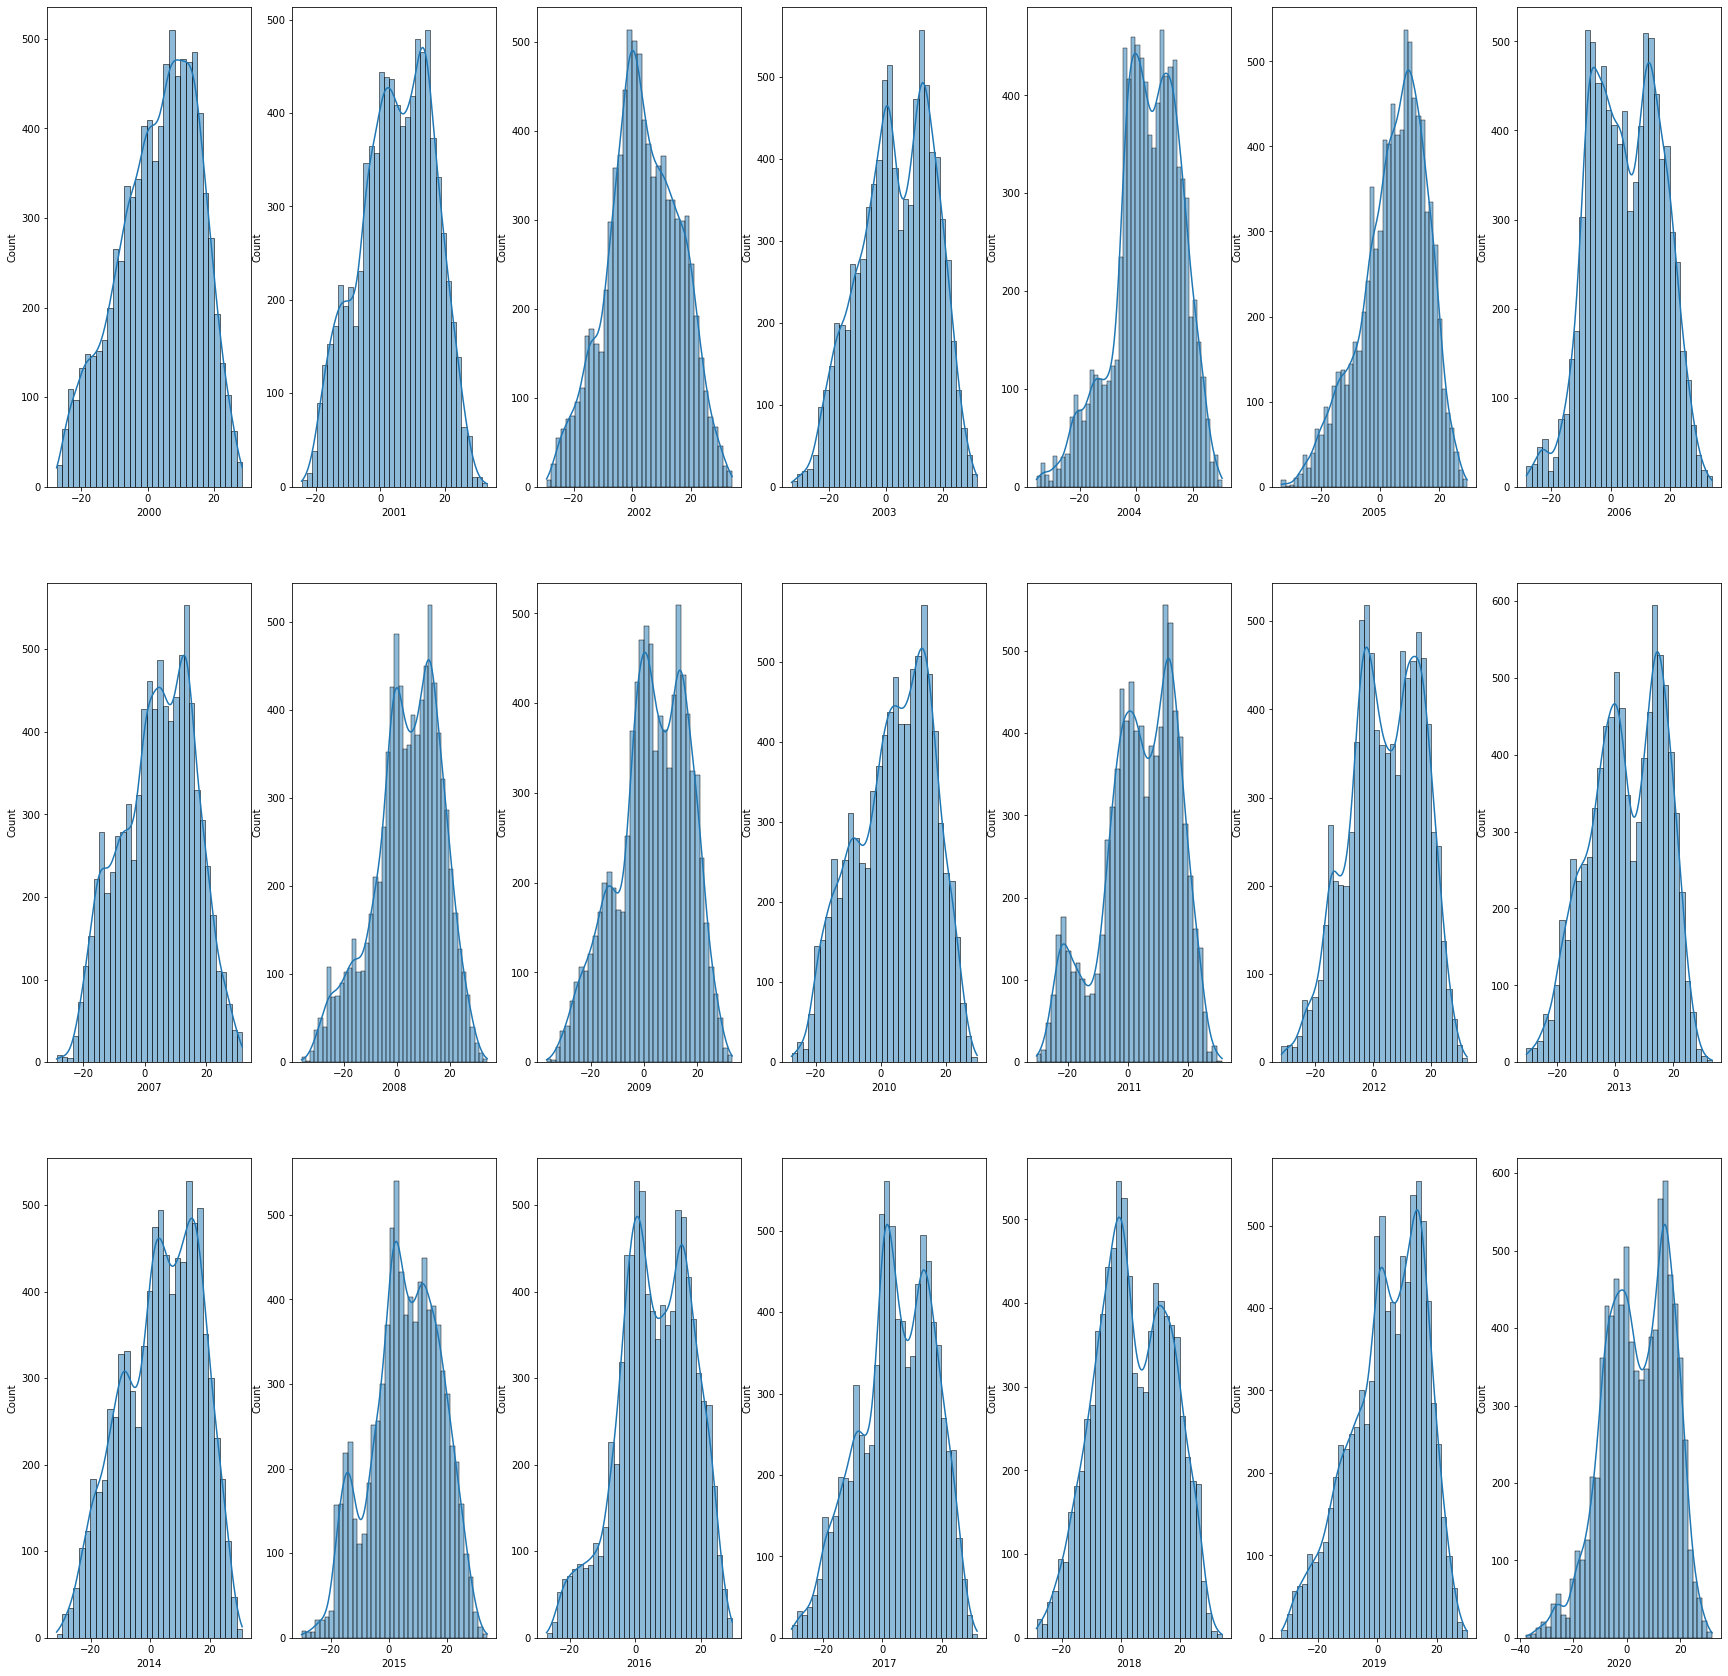

In [11]:
#Graphs for BlatchFord Weather Station
plothist(dfB)

<li> A quick glance of the distribution of data, it seems like most years follow a bimodal type of distribution. 
<li> Will draw a boxplot to further look at the distribution of our temperatures below.

In [12]:
# Creating a fuction to draw boxplots
def plotbox(data):
    plt.figure(figsize=(15,8))
    ax = sns.boxplot(data=data, x='Year', y='Temp')

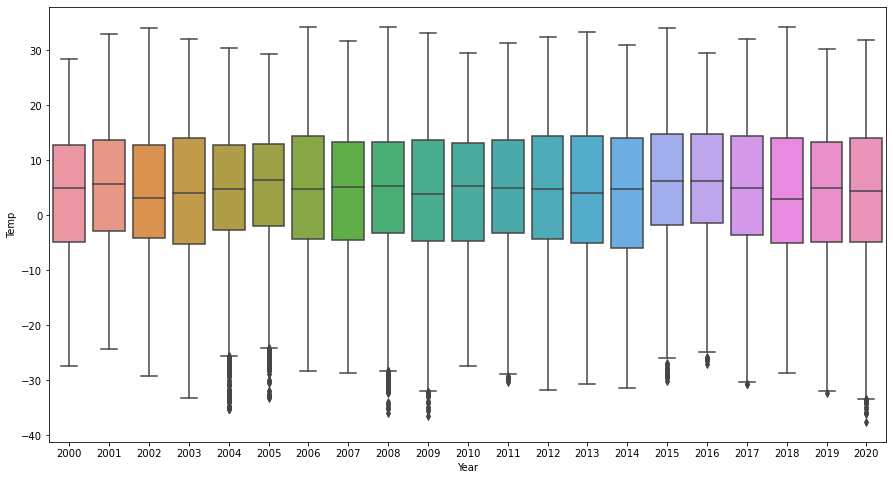

In [13]:
# Boxplot for our Data
plotbox(dfB)

<li> Interquartile range seem to be within +- 5 degrees of each other. The average temperature seems to hover around 2 to <li> 6 degrees. We will calculate the mean temperatures of all the years and look at the trend.

In [14]:
# Creating a list of years and means
years = sorted(dfB["Year"].unique())
yrList = years
mList = []
for y in years:
    tmp = dfB[dfB["Year"]==y]
    tmp2 = tmp["Temp"]
    m = np.mean(tmp2)
    mList.append(float(round(m, 2)))

k = 0
print("%-5s %s" % ('Year', 'AvgTemp'))
for i in yrList:
    print('{:.0f}   {:.2f}'.format(i,mList[k]))
    k+=1

Year  AvgTemp
2000   3.42
2001   5.09
2002   3.68
2003   3.73
2004   4.05
2005   4.81
2006   5.04
2007   4.29
2008   4.03
2009   3.27
2010   4.04
2011   4.01
2012   4.21
2013   3.94
2014   3.75
2015   5.74
2016   5.95
2017   4.62
2018   3.96
2019   3.50
2020   4.05


<li> A simple look at the average temperature does not show any trend. Will examine the difference and sum them to see if <li>it is overall tending upward (ie a positive sum) or downward (ie a negative sum)

In [15]:
# We are going to create a new database comprised of the years and average temperature
BTemp = pd.DataFrame(columns={'Year'})
BTemp['AvgTemp'] = mList
BTemp['Year'] = yrList
BTemp['AvgDiff']= BTemp["AvgTemp"].diff(1)
print(BTemp.head())
print('The sum of the AvgDiff is:',(BTemp['AvgDiff']).sum())


   Year  AvgTemp  AvgDiff
0  2000     3.42      NaN
1  2001     5.09     1.67
2  2002     3.68    -1.41
3  2003     3.73     0.05
4  2004     4.05     0.32
The sum of the AvgDiff is: 0.6299999999999999


<p> The sum of average temperature difference is positive. This is a rudimental way of showing that within the 21 years of data, temperature is trending up. We will plot below a graph showing the average temperatures and see if we can simply visualize this.</p>

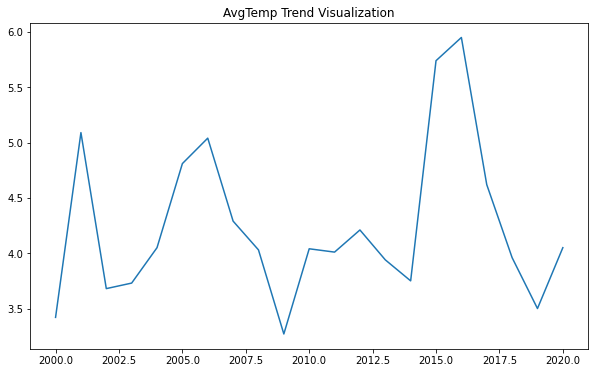

In [16]:
# Ploting the Temp vs Years
ys = BTemp['AvgTemp']
x = BTemp['Year']
plt.figure(figsize=(10,6))
plt.plot(x, ys, '-')
plt.title("AvgTemp Trend Visualization")
plt.show()

<li> It is hard to tell based on the graph above. We will do some calculations to test our hypothesis.

In [17]:
# Will start with the Levene Test
varStat, varP = ss.levene(dfB['Temp'][dfB['Year'] == 2000],
               dfB['Temp'][dfB['Year'] == 2001],
               dfB['Temp'][dfB['Year'] == 2002],
               dfB['Temp'][dfB['Year'] == 2003],
               dfB['Temp'][dfB['Year'] == 2004],
               dfB['Temp'][dfB['Year'] == 2005],
               dfB['Temp'][dfB['Year'] == 2006],
               dfB['Temp'][dfB['Year'] == 2007],
               dfB['Temp'][dfB['Year'] == 2008],
               dfB['Temp'][dfB['Year'] == 2009],
               dfB['Temp'][dfB['Year'] == 2010],
               dfB['Temp'][dfB['Year'] == 2011],
               dfB['Temp'][dfB['Year'] == 2012],
               dfB['Temp'][dfB['Year'] == 2013],
               dfB['Temp'][dfB['Year'] == 2014],
               dfB['Temp'][dfB['Year'] == 2015],
               dfB['Temp'][dfB['Year'] == 2016],
               dfB['Temp'][dfB['Year'] == 2017],
               dfB['Temp'][dfB['Year'] == 2018],
               dfB['Temp'][dfB['Year'] == 2019],
               dfB['Temp'][dfB['Year'] == 2020])
varP

3.8737165177142064e-229

<p> The Levene test tests the null hypothesis that all input samples are from populations with equal variances. With a P-value that low, it meas the sample we have does not have equal variances. This also means we can not perform the Analysis of Variance (ANOVA) test since it is based on the assumption that the variances of the samples are equal. We will proceed to test our hypothesis based on using the Kruskal test.</p>

In [18]:
# Performing the Kruskal Test
varStat, varP = ss.kruskal(dfB['Temp'][dfB['Year'] == 2000],
               dfB['Temp'][dfB['Year'] == 2001],
               dfB['Temp'][dfB['Year'] == 2002],
               dfB['Temp'][dfB['Year'] == 2003],
               dfB['Temp'][dfB['Year'] == 2004],
               dfB['Temp'][dfB['Year'] == 2005],
               dfB['Temp'][dfB['Year'] == 2006],
               dfB['Temp'][dfB['Year'] == 2007],
               dfB['Temp'][dfB['Year'] == 2008],
               dfB['Temp'][dfB['Year'] == 2009],
               dfB['Temp'][dfB['Year'] == 2010],
               dfB['Temp'][dfB['Year'] == 2011],
               dfB['Temp'][dfB['Year'] == 2012],
               dfB['Temp'][dfB['Year'] == 2013],
               dfB['Temp'][dfB['Year'] == 2014],
               dfB['Temp'][dfB['Year'] == 2015],
               dfB['Temp'][dfB['Year'] == 2016],
               dfB['Temp'][dfB['Year'] == 2017],
               dfB['Temp'][dfB['Year'] == 2018],
               dfB['Temp'][dfB['Year'] == 2019],
               dfB['Temp'][dfB['Year'] == 2020])
varP

1.4327178414666332e-90

<p> The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. Based on such a low P-Value, we can not accept the null hypothesis. This means there is a significant difference between medians of the yerly temperature readings we have. Even thought, it does not fit this model well, we will try the Anova test and see if results will agree with Krustal-Wallis test.</p>

In [19]:
# Trying the Anova test
ss.f_oneway(dfB['Temp'][dfB['Year'] == 2000],
               dfB['Temp'][dfB['Year'] == 2001],
               dfB['Temp'][dfB['Year'] == 2002],
               dfB['Temp'][dfB['Year'] == 2003],
               dfB['Temp'][dfB['Year'] == 2004],
               dfB['Temp'][dfB['Year'] == 2005],
               dfB['Temp'][dfB['Year'] == 2006],
               dfB['Temp'][dfB['Year'] == 2007],
               dfB['Temp'][dfB['Year'] == 2008],
               dfB['Temp'][dfB['Year'] == 2009],
               dfB['Temp'][dfB['Year'] == 2010],
               dfB['Temp'][dfB['Year'] == 2011],
               dfB['Temp'][dfB['Year'] == 2012],
               dfB['Temp'][dfB['Year'] == 2013],
               dfB['Temp'][dfB['Year'] == 2014],
               dfB['Temp'][dfB['Year'] == 2015],
               dfB['Temp'][dfB['Year'] == 2016],
               dfB['Temp'][dfB['Year'] == 2017],
               dfB['Temp'][dfB['Year'] == 2018],
               dfB['Temp'][dfB['Year'] == 2019],
               dfB['Temp'][dfB['Year'] == 2020])

F_onewayResult(statistic=30.62838973503029, pvalue=1.0455011594919999e-116)

<p> The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. Even the Anova test does agree with Kruskal's test. We can not accept the null hypothesis which means these temperature readings do not have the same mean.</p>
<p> What if we do the same analysis based on a season? For this project we will look at summer which can be categorized as starting on June 21 and end on September 22. We will start by chopping our data further into summer vs winter.</p>

In [20]:
# Summer Dataframe
dfB['MonDate'] = dfB['Date'].dt.strftime('%m-%d')
start_date = '06-20'
end_date = '09-22'
mask = (dfB['MonDate'] > start_date) & (dfB['MonDate'] <= end_date)
summer = dfB.loc[mask]
summer.head()

,Date,Temp,Year,Month,MonDate
271,2018-07-11 17:00:00,26.2,2018,7,07-11
275,2018-07-11 22:00:00,20.5,2018,7,07-11
281,2020-09-04 14:00:00,22.4,2020,9,09-04
282,2020-09-04 15:00:00,23.0,2020,9,09-04
283,2020-09-04 16:00:00,23.4,2020,9,09-04


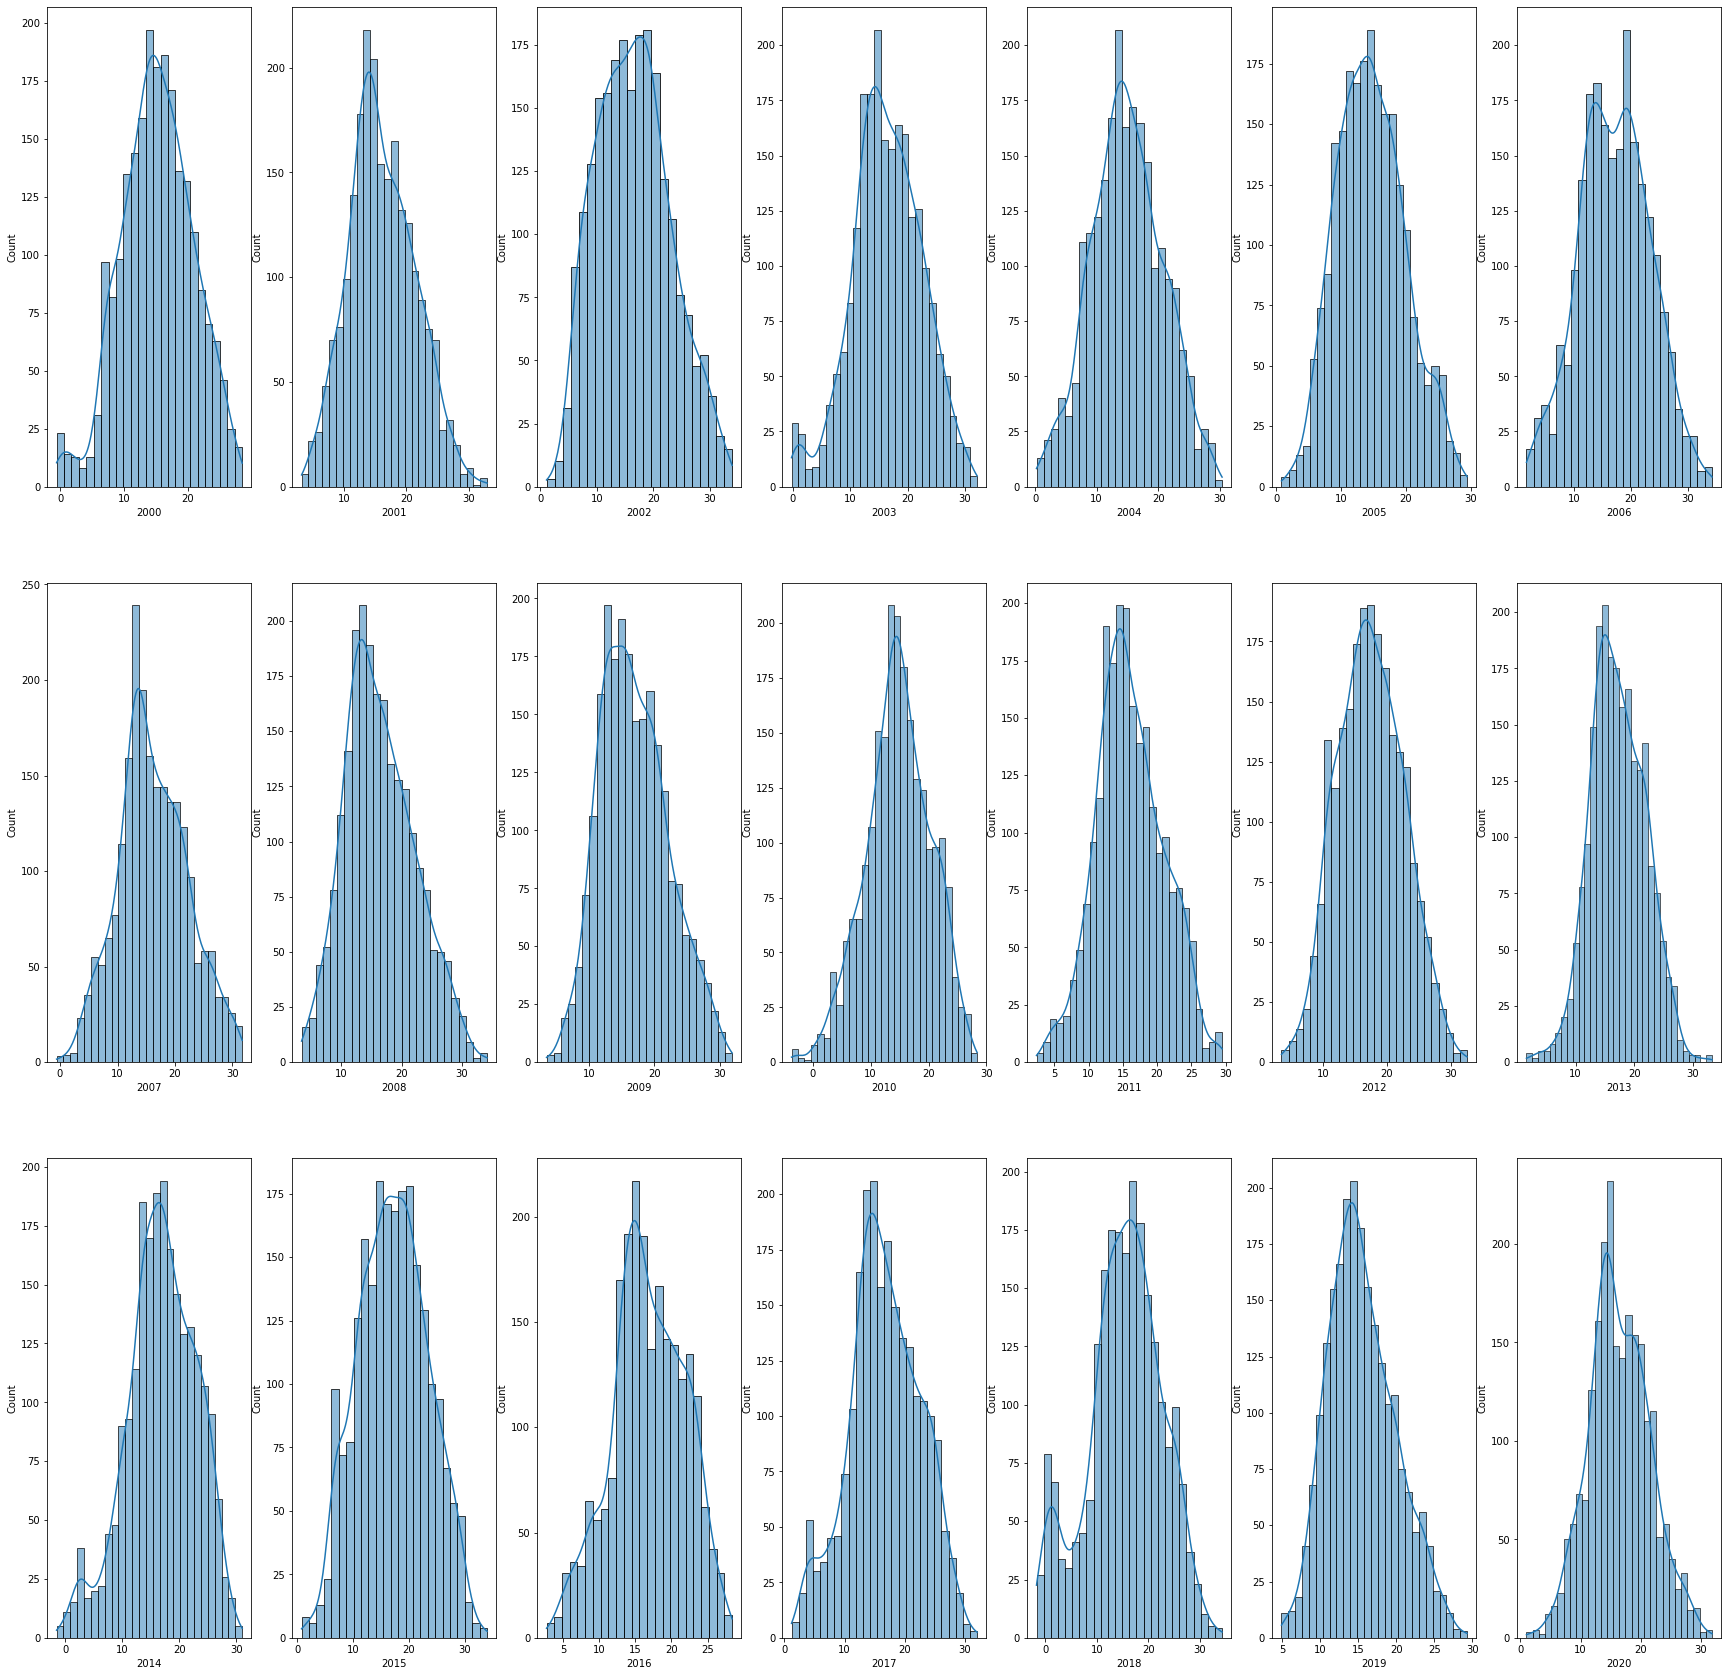

In [21]:
# Visualize the data
plothist(summer)

<li> Most of the data looks relatively normally distributed. Will look at a boxplot graph of this data.

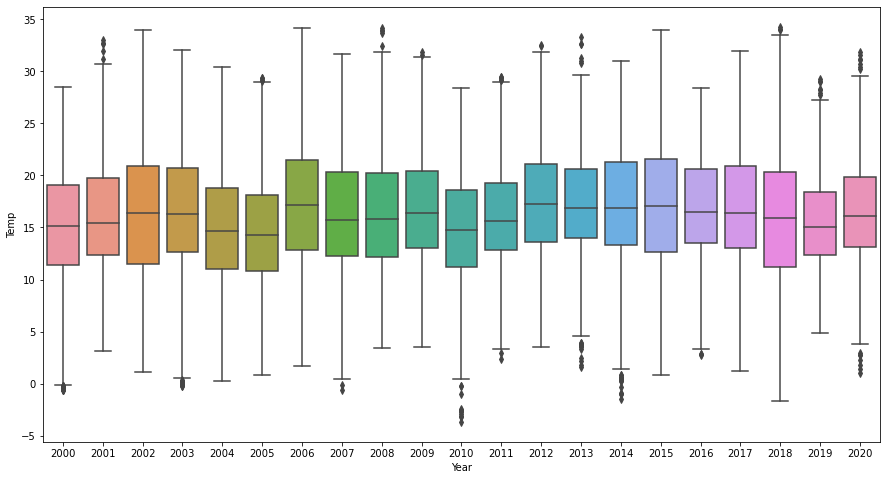

In [22]:
# Ploting a boxplot
plotbox(summer)

<li> Looks like the average summer temperature is within 14 to 17 degrees and the interquartile range within the range of 12 to 21 degrees. Will look at <li>the average temperatures a little more closely

In [23]:
# Creating a list of years and means
years = sorted(summer["Year"].unique())
sumList = years
mList = []
for y in years:
    tmp = summer[summer["Year"]==y]
    tmp2 = tmp["Temp"]
    m = np.mean(tmp2)
    mList.append(float(round(m, 2)))

k = 0
print("%-5s %s" % ('Year', 'SummerAvg'))
for i in yrList:
    print('{:.0f}   {:.2f}'.format(i,mList[k]))
    k+=1

Year  SummerAvg
2000   15.20
2001   16.07
2002   16.60
2003   16.48
2004   14.95
2005   14.62
2006   17.15
2007   16.26
2008   16.43
2009   16.94
2010   14.76
2011   16.07
2012   17.44
2013   17.23
2014   16.89
2015   17.20
2016   16.74
2017   16.67
2018   15.44
2019   15.51
2020   16.47


<li> A simple look does not show any sort of trend. Will examine the incrimental difference and sum it up to see if its trending up or down.

In [24]:
# We are going to create a new database comprised of the years and average temperature
SummerTemp = pd.DataFrame(columns={'Year'})
SummerTemp['AvgTemp'] = mList
SummerTemp['Year'] = sumList
SummerTemp['AvgDiff']= SummerTemp["AvgTemp"].diff(1)
print(SummerTemp.head())
print('The sum of the AvgDiff is:',(SummerTemp['AvgDiff']).sum())

   Year  AvgTemp  AvgDiff
0  2000    15.20      NaN
1  2001    16.07     0.87
2  2002    16.60     0.53
3  2003    16.48    -0.12
4  2004    14.95    -1.53
The sum of the AvgDiff is: 1.2699999999999996


<li> The sum of the difference is possitive, perhaps the temperature is trending higher. We will graph the average temperature below.

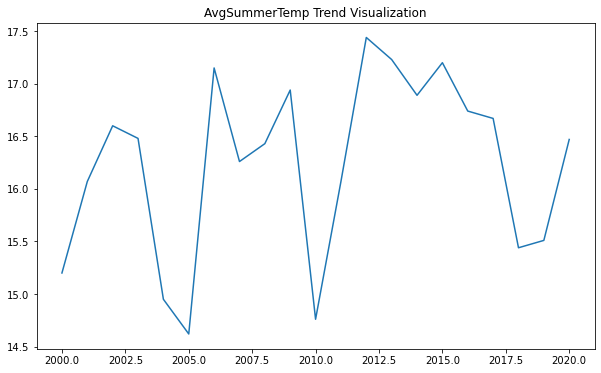

In [25]:
# Ploting the Temp vs Years
ys = SummerTemp['AvgTemp']
x = SummerTemp['Year']
plt.figure(figsize=(10,6))
plt.plot(x, ys, '-')
plt.title("AvgSummerTemp Trend Visualization")
plt.show()

<li> The trend is a little more visual on the above summer temperature graph. We will explore futher with some calculations below.

In [26]:
# Levene test
varStat, varP = ss.levene(summer['Temp'][summer['Year'] == 2000],
               summer['Temp'][summer['Year'] == 2001],
               summer['Temp'][summer['Year'] == 2002],
               summer['Temp'][summer['Year'] == 2003],
               summer['Temp'][summer['Year'] == 2004],
               summer['Temp'][summer['Year'] == 2005],
               summer['Temp'][summer['Year'] == 2006],
               summer['Temp'][summer['Year'] == 2007],
               summer['Temp'][summer['Year'] == 2008],
               summer['Temp'][summer['Year'] == 2009],
               summer['Temp'][summer['Year'] == 2010],
               summer['Temp'][summer['Year'] == 2011],
               summer['Temp'][summer['Year'] == 2012],
               summer['Temp'][summer['Year'] == 2013],
               summer['Temp'][summer['Year'] == 2014],
               summer['Temp'][summer['Year'] == 2015],
               summer['Temp'][summer['Year'] == 2016],
               summer['Temp'][summer['Year'] == 2017],
               summer['Temp'][summer['Year'] == 2018],
               summer['Temp'][summer['Year'] == 2019],
               summer['Temp'][summer['Year'] == 2020])
print(varP)

4.1404491253154375e-229


In [27]:
# Kruskal Test
varStat, varP = ss.kruskal(summer['Temp'][summer['Year'] == 2000],
               summer['Temp'][summer['Year'] == 2001],
               summer['Temp'][summer['Year'] == 2002],
               summer['Temp'][summer['Year'] == 2003],
               summer['Temp'][summer['Year'] == 2004],
               summer['Temp'][summer['Year'] == 2005],
               summer['Temp'][summer['Year'] == 2006],
               summer['Temp'][summer['Year'] == 2007],
               summer['Temp'][summer['Year'] == 2008],
               summer['Temp'][summer['Year'] == 2009],
               summer['Temp'][summer['Year'] == 2010],
               summer['Temp'][summer['Year'] == 2011],
               summer['Temp'][summer['Year'] == 2012],
               summer['Temp'][summer['Year'] == 2013],
               summer['Temp'][summer['Year'] == 2014],
               summer['Temp'][summer['Year'] == 2015],
               summer['Temp'][summer['Year'] == 2016],
               summer['Temp'][summer['Year'] == 2017],
               summer['Temp'][summer['Year'] == 2018],
               summer['Temp'][summer['Year'] == 2019],
               summer['Temp'][summer['Year'] == 2020])
print(varP)

3.736453017338296e-193


In [28]:
# Anova Test
ss.f_oneway(summer['Temp'][summer['Year'] == 2000],
               summer['Temp'][summer['Year'] == 2001],
               summer['Temp'][summer['Year'] == 2002],
               summer['Temp'][summer['Year'] == 2003],
               summer['Temp'][summer['Year'] == 2004],
               summer['Temp'][summer['Year'] == 2005],
               summer['Temp'][summer['Year'] == 2006],
               summer['Temp'][summer['Year'] == 2007],
               summer['Temp'][summer['Year'] == 2008],
               summer['Temp'][summer['Year'] == 2009],
               summer['Temp'][summer['Year'] == 2010],
               summer['Temp'][summer['Year'] == 2011],
               summer['Temp'][summer['Year'] == 2012],
               summer['Temp'][summer['Year'] == 2013],
               summer['Temp'][summer['Year'] == 2014],
               summer['Temp'][summer['Year'] == 2015],
               summer['Temp'][summer['Year'] == 2016],
               summer['Temp'][summer['Year'] == 2017],
               summer['Temp'][summer['Year'] == 2018],
               summer['Temp'][summer['Year'] == 2019],
               summer['Temp'][summer['Year'] == 2020])

F_onewayResult(statistic=51.830115091154084, pvalue=1.3548474807532677e-204)

<li> Looks like we end up with similar results. We will try one more set, this time we will concentrate on the month of February.

In [29]:
# Creating a february dataframe
feb = dfB[dfB['Month']==2]
feb.sample(10)

,Date,Temp,Year,Month,MonDate
563859,2014-02-19 09:00:00,-5.7,2014,2,02-19
475364,2004-02-20 18:00:00,4.5,2004,2,02-20
580020,2016-02-19 12:00:00,-7.8,2016,2,02-19
498772,2007-02-05 15:00:00,-5.3,2007,2,02-05
6805,2020-02-20 09:00:00,-10.1,2020,2,02-20
87233,2017-02-04 12:00:00,-14.2,2017,2,02-04
563085,2014-02-26 01:00:00,-17.0,2014,2,02-26
446216,2001-02-17 19:00:00,-7.1,2001,2,02-17
446955,2001-02-10 11:00:00,-14.9,2001,2,02-10
475782,2004-02-28 03:00:00,-5.7,2004,2,02-28


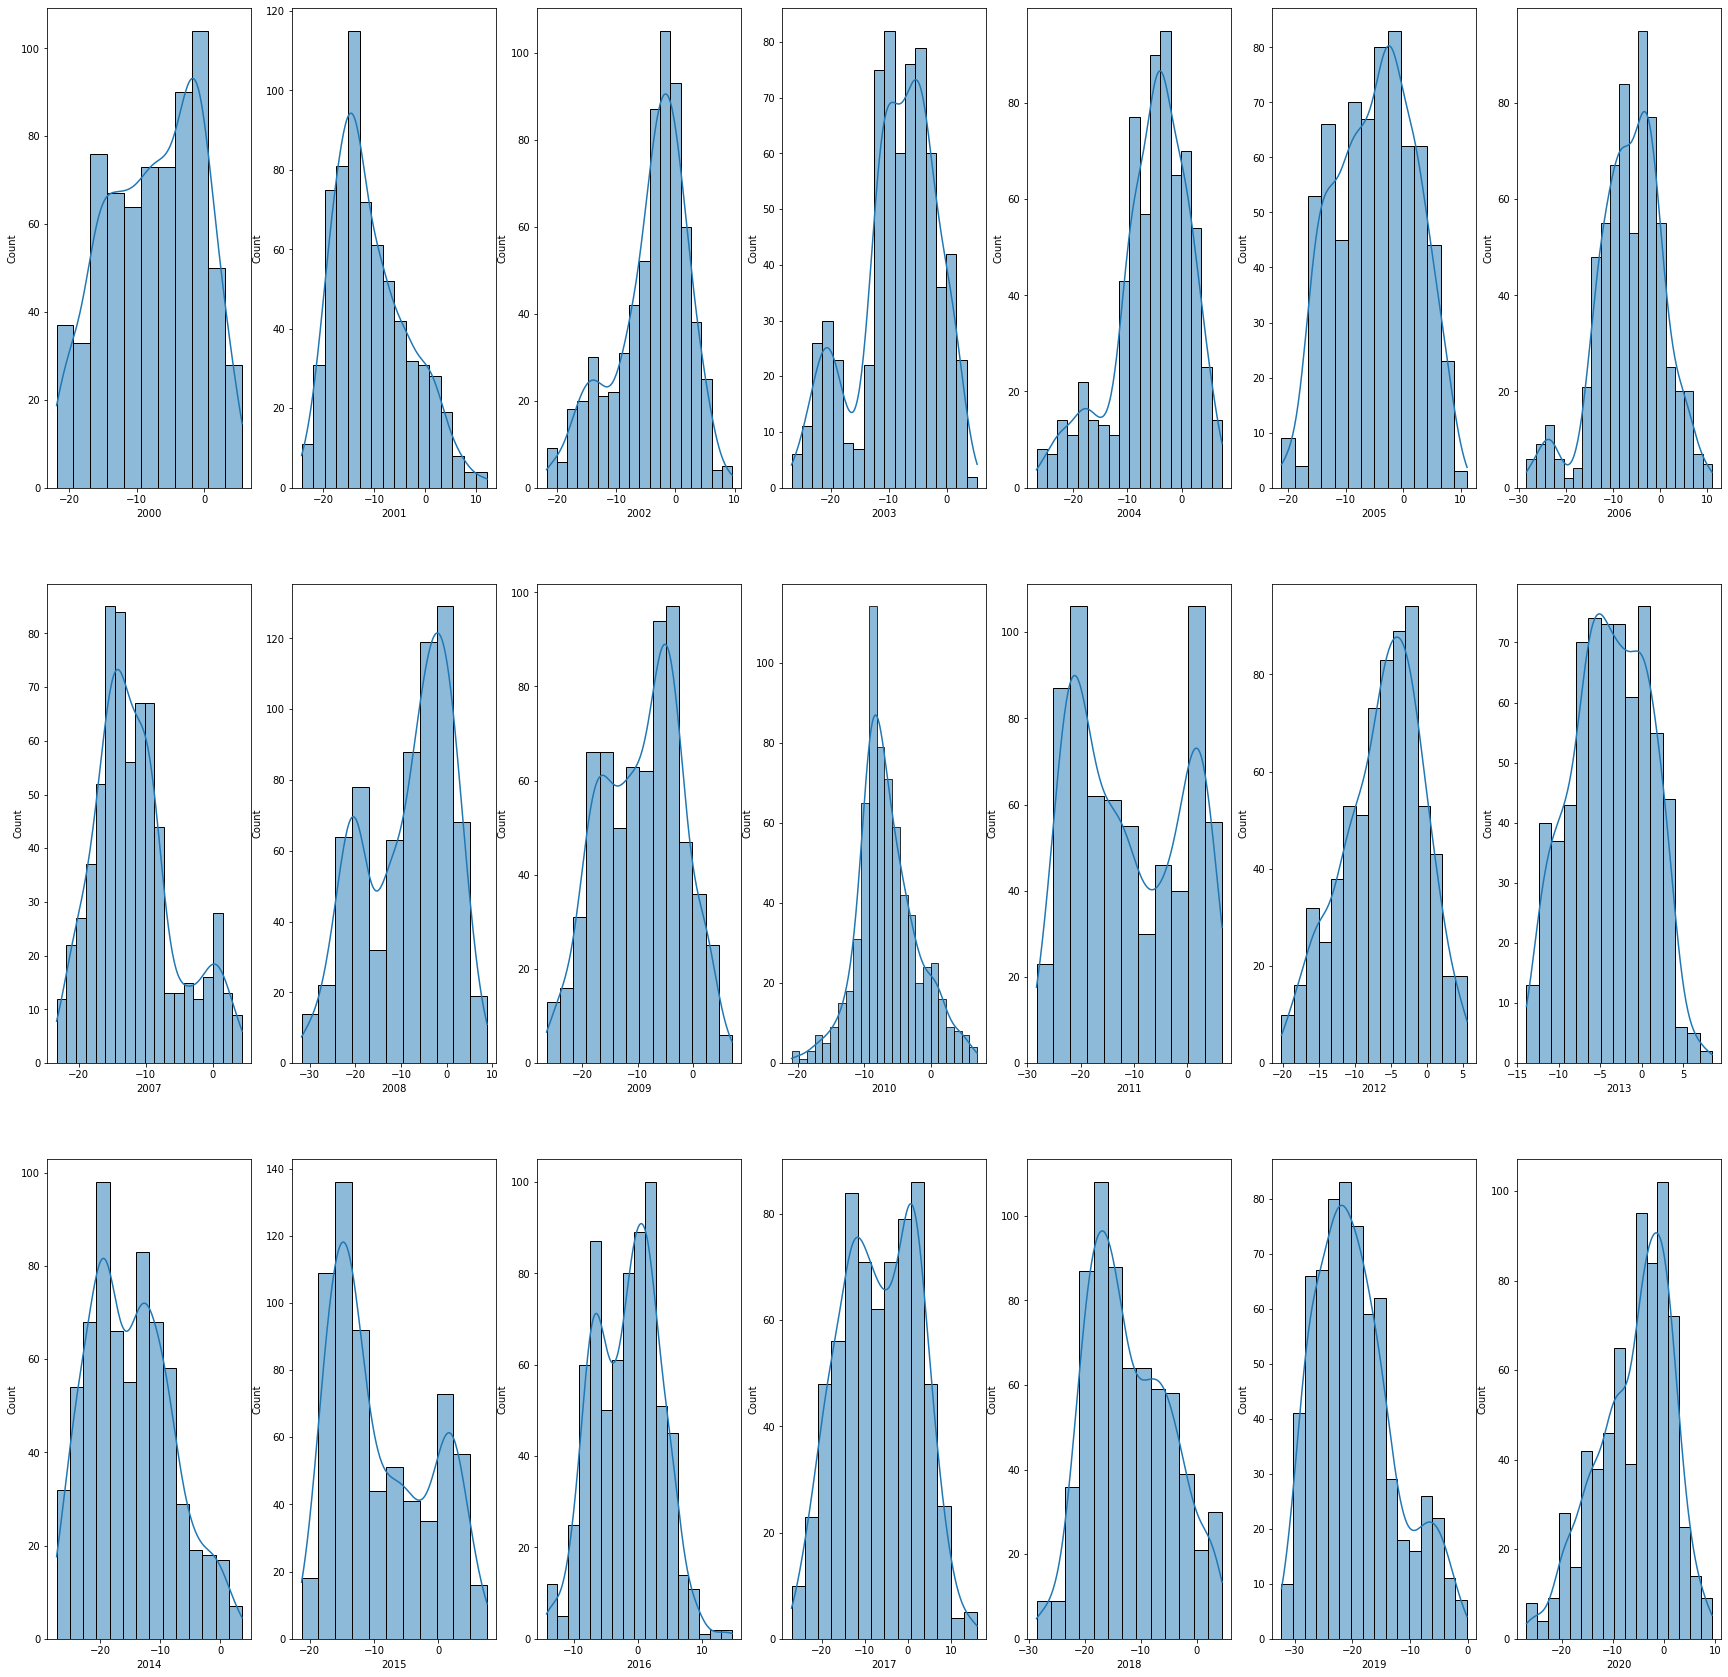

In [30]:
# Visualize the data
plothist(feb)

<li> The distribution of temperature is a litle out of ordinary, with no clear pattern. Will do a boxplot visualization below.

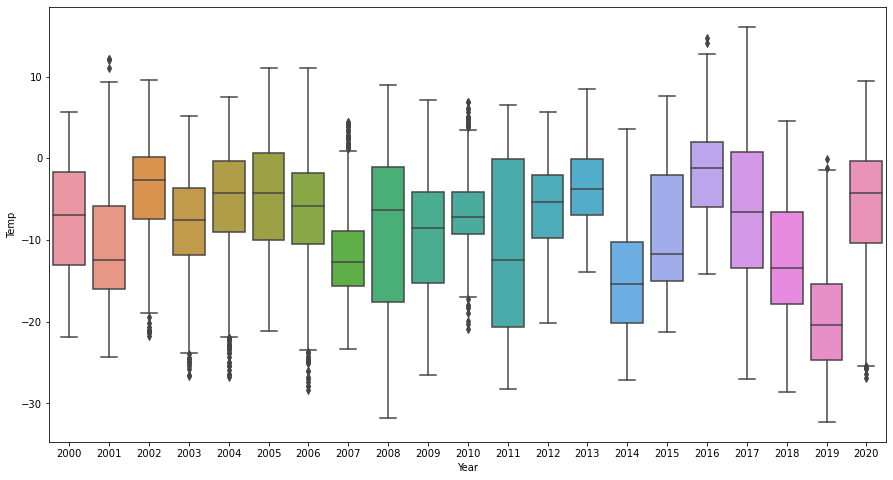

In [31]:
# Boxplot Visualization
plotbox(feb)

<li> This shows clearly that the averages are all over the place. Will print out the average temperature below.

In [32]:
years = sorted(feb["Year"].unique())
yrList = years
febList = []
for y in years:
    tmp = feb[feb["Year"]==y]
    tmp2 = tmp["Temp"]
    m = np.mean(tmp2)
    febList.append(float(round(m, 2)))

k = 0
print("%-5s %s" % ('Year', 'FebruaryAvg'))
for i in yrList:
    print('{:.0f}   {:.2f}'.format(i,febList[k]))
    k+=1

Year  FebruaryAvg
2000   -7.55
2001   -10.60
2002   -4.08
2003   -8.54
2004   -5.46
2005   -4.81
2006   -6.37
2007   -11.66
2008   -8.61
2009   -9.40
2010   -6.57
2011   -11.05
2012   -6.05
2013   -3.79
2014   -14.92
2015   -8.97
2016   -1.69
2017   -6.62
2018   -12.16
2019   -19.45
2020   -5.77


In [33]:
# Checking the trend
febTemp = pd.DataFrame(columns={'Year'})
febTemp['AvgTemp'] = febList
febTemp['Year'] = yrList
febTemp['AvgDiff']= febTemp["AvgTemp"].diff(1)
print(febTemp.head())
print('The sum of the AvgDiff is:',(febTemp['AvgDiff']).sum())

   Year  AvgTemp  AvgDiff
0  2000    -7.55      NaN
1  2001   -10.60    -3.05
2  2002    -4.08     6.52
3  2003    -8.54    -4.46
4  2004    -5.46     3.08
The sum of the AvgDiff is: 1.7800000000000011


<li> Another results showing an up trend. Will graph it below

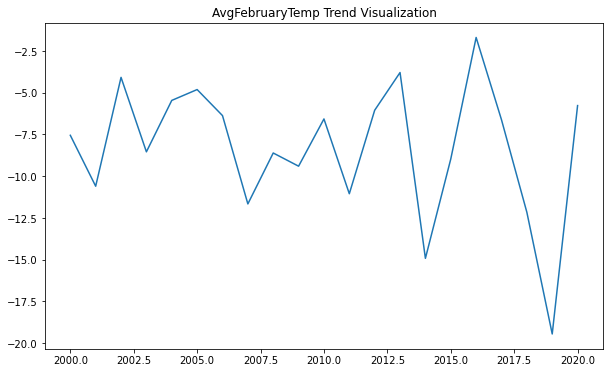

In [34]:
# Ploting the Temp vs Years
ys = febTemp['AvgTemp']
x = febTemp['Year']
plt.figure(figsize=(10,6))
plt.plot(x, ys, '-')
plt.title("AvgFebruaryTemp Trend Visualization")
plt.show()

<li> The visual does not indicate a clear trend. It seems the temperature swings are getting larger, perhaps scewing the data in either 
<li> direction. Will proceed with the calculations.

In [35]:
# Levene test
varStat, varP = ss.levene(feb['Temp'][feb['Year'] == 2000],
               feb['Temp'][feb['Year'] == 2001],
               feb['Temp'][feb['Year'] == 2002],
               feb['Temp'][feb['Year'] == 2003],
               feb['Temp'][feb['Year'] == 2004],
               feb['Temp'][feb['Year'] == 2005],
               feb['Temp'][feb['Year'] == 2006],
               feb['Temp'][feb['Year'] == 2007],
               feb['Temp'][feb['Year'] == 2008],
               feb['Temp'][feb['Year'] == 2009],
               feb['Temp'][feb['Year'] == 2010],
               feb['Temp'][feb['Year'] == 2011],
               feb['Temp'][feb['Year'] == 2012],
               feb['Temp'][feb['Year'] == 2013],
               feb['Temp'][feb['Year'] == 2014],
               feb['Temp'][feb['Year'] == 2015],
               feb['Temp'][feb['Year'] == 2016],
               feb['Temp'][feb['Year'] == 2017],
               feb['Temp'][feb['Year'] == 2018],
               feb['Temp'][feb['Year'] == 2019],
               feb['Temp'][feb['Year'] == 2020])
print(varP)

1.428998951772545e-256


<li> The P-value is very low, which is in allignment with the other tests performed above. Will do the Kruskal test below

In [36]:
# Kruskal test
varStat, varP = ss.kruskal(feb['Temp'][feb['Year'] == 2000],
               feb['Temp'][feb['Year'] == 2001],
               feb['Temp'][feb['Year'] == 2002],
               feb['Temp'][feb['Year'] == 2003],
               feb['Temp'][feb['Year'] == 2004],
               feb['Temp'][feb['Year'] == 2005],
               feb['Temp'][feb['Year'] == 2006],
               feb['Temp'][feb['Year'] == 2007],
               feb['Temp'][feb['Year'] == 2008],
               feb['Temp'][feb['Year'] == 2009],
               feb['Temp'][feb['Year'] == 2010],
               feb['Temp'][feb['Year'] == 2011],
               feb['Temp'][feb['Year'] == 2012],
               feb['Temp'][feb['Year'] == 2013],
               feb['Temp'][feb['Year'] == 2014],
               feb['Temp'][feb['Year'] == 2015],
               feb['Temp'][feb['Year'] == 2016],
               feb['Temp'][feb['Year'] == 2017],
               feb['Temp'][feb['Year'] == 2018],
               feb['Temp'][feb['Year'] == 2019],
               feb['Temp'][feb['Year'] == 2020])
print(varP)

0.0


<li> This test also provided a very low P-value. Will try to do the Anova test below

In [37]:
# Anova test
ss.f_oneway(feb['Temp'][feb['Year'] == 2000],
               feb['Temp'][feb['Year'] == 2001],
               feb['Temp'][feb['Year'] == 2002],
               feb['Temp'][feb['Year'] == 2003],
               feb['Temp'][feb['Year'] == 2004],
               feb['Temp'][feb['Year'] == 2005],
               feb['Temp'][feb['Year'] == 2006],
               feb['Temp'][feb['Year'] == 2007],
               feb['Temp'][feb['Year'] == 2008],
               feb['Temp'][feb['Year'] == 2009],
               feb['Temp'][feb['Year'] == 2010],
               feb['Temp'][feb['Year'] == 2011],
               feb['Temp'][feb['Year'] == 2012],
               feb['Temp'][feb['Year'] == 2013],
               feb['Temp'][feb['Year'] == 2014],
               feb['Temp'][feb['Year'] == 2015],
               feb['Temp'][feb['Year'] == 2016],
               feb['Temp'][feb['Year'] == 2017],
               feb['Temp'][feb['Year'] == 2018],
               feb['Temp'][feb['Year'] == 2019],
               feb['Temp'][feb['Year'] == 2020])

F_onewayResult(statistic=226.1809280721448, pvalue=0.0)

<li> This also provided a very low P-Value. Based on all the P-values we calcuated, we will have to reject the null hypothesis. This means the effects of Global Warming can be felt in Edmonton. Please refer to the PDF document for more on our analysis.